# Laboratorio 4: Programación Lineal Mixta (MA4702, otoño 2023)

Fecha: 31 de Mayo, 2023.<br/>
Profesor: Marcos Kiwi.<br/>
Auxiliares: Benjamín Jauregui y Cristián Palma.<br/>

## Preliminares

Este laboratorio consta de 2 etapas. Una tarea introductoria y una etapa presencial.
La nota global del laboratorio será 40 % (TI) + 60 % (TP), donde (TI) es la nota de la tarea
introductoria y (TP) la nota del trabajo presencial.

La tarea introductoria es de carácter estrictamente individual. La etapa presencial es de carácter grupal. 

## Laboratorio 4: Trabajo Presencial (TP)

## Instrucciones.

En la parte presencial del laboratorio, realice las siguientes actividades:

* Complete la celda “Datos grupo”.
* Descargue los archivos y funciones auxiliares de UCursos (todos deben quedar en el mismo directorio en que está almacenado este archivo).
* Lea el enunciado y complete los ejercicios 1, 2 y 3.
* Envíe el archivo .ipynb por el módulo de tareas de UCursos en la TAREA: Laboratorio 4 presencial. 
* Plazo de entrega: **miércoles 31 de mayo a las 18:00** (se descontará 0.5 pts. por cada 15 min o fracción de atraso).

<div class="alert alert-block alert-warning">
    Advertencia: Si en el archivo que entregue alguna de las celdas arroja un mensaje de error al ejecutar, o el código entra en un loop infinito y no retorna con ninguna salida, Ud. deberá agregar una nota al respecto, explicando cuál cree que es el problema. Si no lo hace, se le penalizará adicionalmente.               
</div>


## Datos del grupo

<div class="alert alert-block alert-success">

- Número o identificador del Grupo: 
    
- Integrante 1: Miguel Escobar

- Integrante 2: Nicolás fuenzalida     </div>


## Introducción

El objetivo de esta etapa es implementar el algoritmo del sub-gradiente para resolver una relajación Lagrangiana del problema *Uncapacitated Facility Location (UFL)*, y explorar cómo lo anterior puede ser utilizado junto con el método de *Branch & Bound*.

Recordar que en el problema UFL, un conjunto de clientes $\mathcal C$ debe ser servido desde un conjunto potencial de localizacones $\mathcal L$. 
El costo de habilitar la localización $\ell\in\mathcal L$ es $f_{\ell}\geq 0$ mientras que la utilidad de servir al cliente $c\in\mathcal C$ desde $\ell\in\mathcal L$ está dado por $u_{c,\ell}$.
Se quiere maximizar la utilidad sujeto a servir a todos los clientes, es decir, se quiere determinar:

$$
\begin{array}{rlll}
(UFL):\  z_{UFL} = & \max_{x, y} \sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}y_{c,\ell}-\sum_{\ell\in\mathcal L} f_\ell x_\ell \\
\text{s.a.} & \sum_{\ell\in\mathcal{L}}y_{c,\ell} = 1, & \forall c\in\mathcal C, \\
& y_{c,\ell} \leq x_{\ell}, & \forall c\in\mathcal C, \forall \ell\in\mathcal{L}, \\
& y_{c,\ell}\geq 0, & \forall c\in\mathcal{C}, \forall \ell\in\mathcal{L}, \\
& x_{\ell}\in\{0,1\}, & \forall \ell\in\mathcal{L}.
\end{array}
$$

Recordar que en la Tarea Introductoria se definió

$$
\begin{array}{rrlll}
 (UFL_x): & z_{UFL}(x) = & \max_{y} \sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}y_{c,\ell}-\sum_{\ell\in\mathcal L} f_\ell x_\ell \\
& \text{s.a.} & \sum_{\ell\in\mathcal{L}}y_{c,\ell} = 1, & \forall c\in\mathcal C, \\
& & 0 \leq y_{c,\ell} \leq x_{\ell}, & \forall c\in\mathcal C, \forall \ell\in\mathcal{L}, 
\end{array}
$$

y se estableció que si $\mu\in\mathbb{R}^{\mathcal C}$ y 

$$
\begin{array}{rrll}
(LR_{\mu}): & z_{LR}(\mu) = & \max_{x,y}\sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L} (u_{c,\ell}-\mu_c)y_{c,\ell}-\sum_{\ell\in\mathcal L}f_{\ell}x_{\ell}+\sum_{c\in\mathcal C}\mu_c, \\
& \text{s.a.} & 0\leq y_{c,\ell}\leq x_{\ell}, & \forall c\in\mathcal C, \forall \ell\in\mathcal L, \\
& & x_{\ell}\in \{0,1\}, & \forall \ell\in\mathcal{L},
\end{array}
$$

entonces un sub-gradiente $s\in\mathbb{R}^{\mathcal C}$ de $z_{LR}(\mu)$ en $\mu=\mu^0\in\mathbb{R}^{\mathcal{C}}$ está dado por $s_c=1-\sum_{\ell\in\mathcal{L}}y_{c,\ell}(\mu^0)$ para $c\in\mathcal C$, donde:

$$
y_{c,\ell}(\mu^0) = \begin{cases}
1, & \text{si $u_{c,\ell}>\mu^0_c$ y $\sum_{c\in\mathcal{C}}(u_{c,\ell}-\mu^0_c)^+> f_\ell$}, \\
0, & \text{si no.}
\end{cases}
$$

## Ejercicio I

1a) (4.0 ptos) Complete el código de la siguiente celda para que la función `subgrad()`, dados

* `mu[]` vector a coeficientes reales de dimensión $|\mathcal{C}|$ que representa $\mu\in\mathbb{R}^{\mathcal{C}}$, 
* `util[]` matriz a coeficientes reales de tamaño $|\mathcal{C}|\times|\mathcal{L}|$ que representa $u\in\mathbb{R}^{\mathcal{C}\times\mathcal{L}}$, y
* `costo[]` vector a coeficientes reales positivos de dimensión $|\mathcal{L}|$ que representa $f\in\mathbb{R}_+^{\mathcal L}$,


retorne un arreglo `s[]` de dimensión igual a la de `mu[]` representando el subgradiente $s\in\mathbb{R}^{\mathcal{C}}$ de $z_{LR}(\mu)$ donde $\mu$ está especificado a través de `mu[]`. 


In [3]:
function subGrad(mu, util, costo)
    # Comenzar a completar código aquí.
    C_len, L_len = size(util)

    first_bool = (util .> mu)
    second_bool = sum(util .- mu, dims=1) .> transpose(costo)

    y = first_bool .&& second_bool
    s = 1 .- sum(y, dims=2)
    
    # Terminar de completar código aquí.

    return s
end


subGrad (generic function with 1 method)

1b) (2.0 pts) En el `.zip` que se distribuyó junto con el enunciado de este laboratorio, se incluye (en el directorio `datTP`) un par de archivos que describen una instancia de $(UFL)$. Esta instancia corresponde a un conjunto de clientes distribuidos en el plano cartesiano y una colección de localizaciones también distribuida en el plano cartesiano así como los correspondientes costos de habilitarlas.

En el `.zip` también se provee el archivo `lab4TP-funcionalidad.jl` que incluye:
* la funcionalidad proveída en la Tarea Introductoria: `cargaInst()`, `genArcos()` y `dibuja()`,
* la función `initMu()` del Jupyter Notebook de la Tarea Introductoria,
* la función `zLR()` que dados `mu[]`, `util[]` y `costo[]` representando $\mu\in\mathbb{R}^{\mathcal{C}}$, $u\in\mathbb{R}^{\mathcal{C}\times\mathcal{L}}$ y $f\in\mathbb{R}_+^{\mathcal{L}}$, retorna $z_{LR}(\mu)$,
* la función `cotaInf()` que dados `mu[]`, `util[]` y `costo[]` representando $\mu\in\mathbb{R}^{\mathcal{C}}$, $u\in\mathbb{R}^{\mathcal{C}\times\mathcal{L}}$ y $f\in\mathbb{R}_+^{\mathcal{L}}$, retorna $x\in\{0,1\}^{\mathcal{L}}$ (es decir, indicatriz de localizaciones a habilitar), y
* la función `zUFL()` que dados `x[]`, `util[]` y `costo[]` representando $x\in\{0,1\}^{\mathcal{L}}$, $u\in\mathbb{R}^{\mathcal{C}\times\mathcal{L}}$ y $f\in\mathbb{R}_+^{\mathcal{L}}$, retorna $z_{UFL}(x)$.

Ejecute la siguiente celda para aplicar el algoritmo del sub-gradiente en una de las instancias que se proveen. Pruebe distintas combinaciones de los parámetros 

* `iter`: número de iteraciones a realizar en el algoritmo del sub-gradiente.
* `theta`: paso en el algoritmo del sub-gradiente. 
* `prd`: número de iteraciones a efectuar antes de volver a decrecer el paso a la mitad.

Fije estos 3 parámetros de forma de obtener la mejor cota (superior) que pueda en $\min_{\mu\geq\vec{0}} z_{LR}(\mu)$.  

valor inicial incumbente = -3896.469000000001

Comienzo de iteraciones del algoritmo del sub-gradiente.
iter = 1 obj_zLR = 2784.2719999999995 valor incumbente = 2381.558
iter = 2 obj_zLR = 12940.782999999998 valor incumbente = 962.3679999999995
iter = 3 obj_zLR = 15277.277 valor incumbente = 1987.819
iter = 4 obj_zLR = 13011.692 valor incumbente = 1987.819
iter = 5 obj_zLR = 10880.312999999998 valor incumbente = 1987.819
iter = 6 obj_zLR = 9214.358 valor incumbente = 2080.691
iter = 7 obj_zLR = 8867.108000000002 valor incumbente = 962.3679999999995
iter = 8 obj_zLR = 9120.839 valor incumbente = 962.3679999999995
iter = 9 obj_zLR = 9848.429999999998 valor incumbente = 962.3679999999995
iter = 10 obj_zLR = 4118.531 valor incumbente = 1869.6630000000005
iter = 11 obj_zLR = 12421.385999999997 valor incumbente = 962.3679999999995
iter = 12 obj_zLR = 11921.483 valor incumbente = 1987.819
iter = 13 obj_zLR = 9694.192000000001 valor incumbente = 1987.819
iter = 14 obj_zLR = 10454.793000000001 

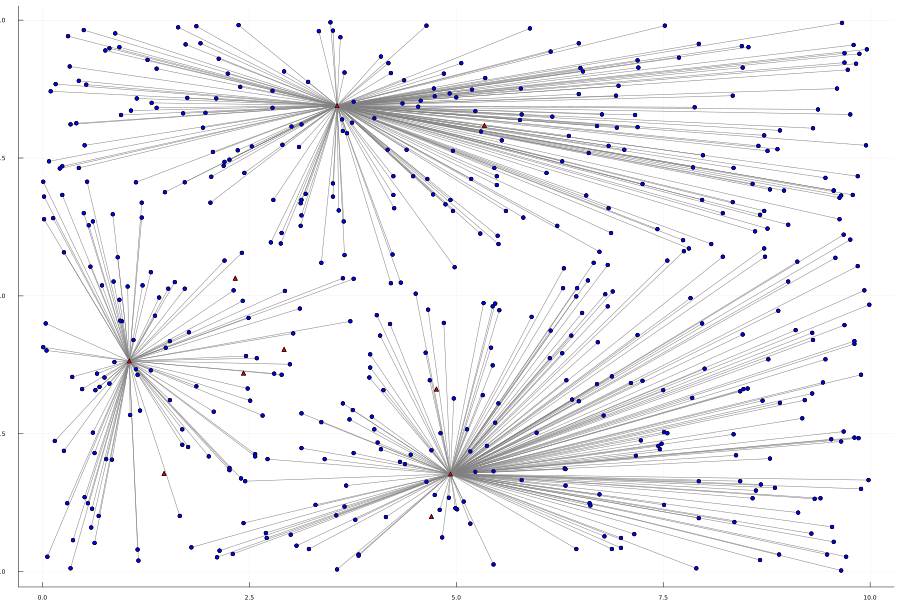

numClientes = 500, numLocaliz = 10
menor valor de zLR obtenido = 2381.5579999999995
valor incumbente = 2381.558, numLocalizAbiertas = 3.0


In [14]:
using DelimitedFiles 
dirInst = "datTP";            # Directorio con el archivo de la instancia Tarea Introductoria.

include( "lab4TP-funcionalidad.jl" );                     # Incluir archivo con funcionalidad proveída.
util, costo, Fclt, Clnt = cargaInst( dirInst, "i003" )    # Cargar instancia

# Modifique los siguientes 3 parámetros y fíjelos para obtener el mejor 
# (menor) valor de obj_zLR al ejecutar la celda.
iter = 1000  # Número (entero) de iteraciones del alg. del sub-gradiente a realizar
theta = 5   # Paso inicial
prd = 20   # Número (entero) de iteraciones por paso

mu = initMu( util )   # Inicializar mu[]
minObj_zLR = Inf      # Inicializa mejor cota superior

xIncmb = ones(size(util,2))                    # Inicializar incumbente
zIncmb = zUFL( xIncmb, util, costo )           # Determinar valor de candidato incumbente
println( "valor inicial incumbente = ", zIncmb )
println()
println( "Comienzo de iteraciones del algoritmo del sub-gradiente.")
for t in 1:iter
    obj_zLR = zLR( mu, util, costo )           # Determina valor de la relajación Lagrangiana
    minObj_zLR = min( obj_zLR, minObj_zLR )    # Actualiza cota superior
  
    x = cotaInf( mu, util, costo )             # Determina candidato incumbente
    obj_z = zUFL( x, util, costo )             # Determinar valor de candidato incumbente
    
    s = subGrad( mu, util, costo )             # Calcula nuevo sub-gradiente
    mu = mu - theta * s                        # Actualiza mu[]

    if ( obj_z > zIncmb )
        xIncmb = x                             # Actualizar incumbente
        zIncmb = obj_z                         # Actualiza cota inferior
    end
    
    println( "iter = ", t, " obj_zLR = ", obj_zLR, " valor incumbente = ", obj_z )
    if ( (t % prd) == 0 )                      # Decrementar paso a la mitad cada prd iteraciones
        theta = theta/2
    end
end
println( "Fin de iteraciones del algoritmo del sub-gradiente.")
println()

arcos = genArcos( xIncmb, util )
dibuja( Clnt, Fclt, arcos )

println( "numClientes = ", size(util,1), ", numLocaliz = ", size(util,2) )
println( "menor valor de zLR obtenido = ", minObj_zLR )
println( "valor incumbente = ", zIncmb, ", numLocalizAbiertas = ", sum(xIncmb) )

## Ejercicio 2

2a) (1.2 pts) Pruebe que $z'_{LR}(\mu)=z_{LR}(\mu)$ donde:
$$
\begin{array}{rrll}
(LR'_{\mu}): & z'_{LR}(\mu) = & \max_{x}\sum_{\ell\in\mathcal L}\big(\sum_{c\in\mathcal C} (u_{c,\ell}-\mu_c)^+-f_{\ell}\big)x_{\ell}+\sum_{c\in\mathcal C}\mu_c, \\
& \text{s.a.} & x_{\ell}\in \{0,1\}, \qquad \forall \ell\in\mathcal{L}.
\end{array}
$$

<div class="alert alert-block alert-warning"> Respuesta ejercicio 2a).

Vamos a utilizar el hecho de que si A y B conjuntos no vacíos, $max\{f(x,y)| x \in A, y \in B\} = max\{max\{f(x,y)| x \in A\}| y \in B\}$. Primero maximizaremos sobre $y$, luego sobre $x$.

Notemos que los únicos valores que le conviene tomar a $y_{c, \ell}$ son $0$ y $x_\ell$, cualquier otro valor intermedio puede incrementarse moviendo $y_{c, \ell}$ a $0$ si $(u_{c,\ell}-\mu_c) < 0$, o bien a $x_\ell$ si $(u_{c,\ell}-\mu_c) \geq 0$. Si $(u_{c,\ell}-\mu_c) = 0$ no hace diferencia el valor de $y_{c, \ell}$, por lo que SPG supondremos que es o bien $0$ o bien $x_\ell$. Llevar a cabo este proceso corresponde a la maximización sobre $y$ y nos deja con la siguiente función objetivo para maximizar sobre $x$:

$$
\begin{array}{rrll}
(LR_{\mu}): & z_{LR}(\mu) = & \max_{x}\sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L} (u_{c,\ell}-\mu_c)^+x_\ell-\sum_{\ell\in\mathcal L}f_{\ell}x_{\ell}+\sum_{c\in\mathcal C}\mu_c, \\
& \text{s.a.} & x_l \in \{0, 1\},  & \forall \ell\in\mathcal{L}.
\end{array}
$$

- Factorizamos en la función objetivo y cambiamos el orden de las sumatorias:

$$
\begin{array}{rrll}
(LR_{\mu}): & z_{LR}(\mu) = & \max_{x}\sum_{\ell\in\mathcal L} \left(\sum_{c\in\mathcal C}\left((u_{c,\ell}-\mu_c)^+-f_{\ell}\right) \right)x_{\ell}+\sum_{c\in\mathcal C}\mu_c, \\
& \text{s.a.} & x_l \in \{0, 1\},  & \forall \ell\in\mathcal{L}.
\end{array}
$$
</div>

2b) Sean $A\in\mathbb{R}^{m\times n}$, $b\in\mathbb{R}^m$, y $c\in\mathbb{R}^n$. Sea $\vec{1}\in\mathbb{R}^n$ el vector cuyas coordenadas son todas iguales a $1$. Considere el siguiente programa entero $(I)$, su relajación $(L)$, la relajación Lagrangiana $(LG_\mu)$ de $(L)$, y el dual $(DG_\mu)$ de $(LG_\mu)$:

$$
\begin{array}{rrll}
(I): & z_{I} = & \max_{x} c^Tx \\
& \text{s.a.} & Ax\leq b, \\
& & x\in \{0,1\}^n.
\end{array}
$$

$$
\begin{array}{rrl}
(L): & z_{L} = & \max_{x} c^Tx, \\
& \text{s.a.} & Ax\leq b, \\
& & \vec{0} \leq x \leq \vec{1}.
\end{array}
$$

$$
\begin{array}{rrll}
(LG_\mu): & z_{LG}(\mu) = & \max_{x} (c^T-\mu^TA)x + \mu^Tb \\
& \text{s.a.} & \vec{0} \leq x \leq \vec{1}.
\end{array}
$$

$$
\begin{array}{rrll}
(DG_\mu): & z_{DG}(\mu) = & \min_{\pi,\tau} \tau^T\vec{1}+\mu^Tb \\
& \text{s.a.} & -\pi+\tau = c-A^T\mu, \\
& & \pi, \tau\geq \vec{0}.
\end{array}
$$

Sea $\mu\in\mathbb{R}^m_+$ y $(\pi^\star,\tau^\star)$ óptimos de $(DG_\mu)$. 
Pruebe (3.6 pts) que 

$$    
\text{$x^\star$  factible para $(I)$ tal que $c^Tx^\star\geq \underline{z}$}
\implies \forall i_\star\in [n],\ \underline{z} \leq -\pi^\star_{i_\star}x^\star_{i_\star} + z_{LG}(\mu).
$$

Concluya (1.2 ptos) que 

$$
\text{$x^\star$  factible para $(I)$ tal que $c^Tx^\star\geq \underline{z}$} \ \wedge \
\pi^\star_{i_\star}>z_{LG}(\mu)-\underline{z} \implies x^\star_{i_\star}=0.
$$


<div class="alert alert-block alert-warning"> Respuesta ejercicio 2b).

</div>

## Ejercicio 3

Especializando lo demostrado en el Ejercicio 2b) al caso de $(UFL)$, y usando lo demostrado en el Ejercicio 2a), se obtiene (no lo demuestre) que 

$$
\text{$(x^\star,y^\star)$ factible para $(UFL)$ de costo al menos $\underline{z}$} 
\ \wedge \
z_{LR}(\mu)-\underline{z} < f_{\ell_\star} - \sum_{c\in\mathcal{C}}(u_{c,\ell}-\mu_c)^+
\implies
x^\star_{\ell_\star}=0.
$$

3a) Complete el código de la siguiente celda para que la función `findFixable()`, en las entradas 

* `mu[]`, `util[]`, `costo[]` como en el Ejercicio 1, 
* `cmpr` real representando $z_{LR}(\mu)-\underline{z}$,

retorne un vector indicatriz de $\mathcal{L}_\star\subseteq\mathcal{L}$ tal que
$z_{LR}(\mu)-\underline{z} < f_{\ell_\star} - \sum_{c\in\mathcal{C}}(u_{c,\ell}-\mu_c)^+$
para todo $\ell_\star\in\mathcal{L}_\star$.

In [5]:
function findFixable(mu, util, costo, cmpr)
    # Comenzar a completar código aquí.
    function zLR(mu, util, costo)

        util_sum_term = sum(max.(util .- mu, 0), dims=1)
        first_term = sum(util_sum_term .- costo)
        second_term = sum(mu)
    
        return first_term + second_term
    end

    L_star = (costo .- transpose(sum(max.(util .- mu, 0), dims=1))) .> cmpr

    
    return L_star
    # Terminar de completar código aquí.
end

findFixable (generic function with 1 method)

3b) Complete el código de la siguiente celda para que la función `mdlUFL()`, en las entradas

* `util[]` y `costo[]` como en el Ejercicio 1, 
* `fix[]` vector de dimensión $\mathcal{L}$ y coordenadas en $\{0,1\}$ representando un vector indicatriz de $\mathcal{L}_\star\subseteq\mathcal{L}$ de localizaciones que **no** es necesario habilitar para alcanzar un óptimo, 

retorne un modelo en `JuMP/Gurobi` de $(UFL)$ donde las variables indicadas por `fix[]` están fijas en $0$. 

**Nota:** Use `x[]` e `y[]` para denotar las variables de su modelo que representan las variables $x$ e $y$ de $(UFL)$, respectivamente. 

In [6]:
using JuMP, Gurobi;           

const GUROBI_ENV = Gurobi.Env() 

function mdlUFL(util, costo, fix)   
    mdl = Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GUROBI_ENV), "OutputFlag" => 0, "Presolve" => 0));

    c_len, l_len = size(util)

    # Comenzar a completar código aquí.
    
    x_var = @variable(mdl, x[1:l_len], Bin)
    y_var = @variable(mdl, y[1:c_len, 1:l_len], Bin) # Creo que es Bin tb, aunque no sale en el enunciado.
    
    @objective(mdl, Max, sum(y.*util) - sum(costo.*x))

    @constraints(mdl, begin
        [i in 1:c_len], sum(y[i, :]) == 1
        [i in 1:c_len, j in 1:l_len], y[i, j]*(1-fix[j]) ≤ x[j]*(1-fix[j])
        [i in 1:c_len, j in 1:l_len], y[i, j]*(1-fix[j]) ≥ 0
        [i in 1:l_len], x[i]*fix[i] == 0
        [i in 1:c_len, j in 1:l_len], y[i, j]*fix[j] == 0
    end)

    return mdl, x_var
end

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-22


mdlUFL (generic function with 1 method)

Finalmente, ejecute las dos siguientes celdas. El resultado de la primera indica el valor óptimo de la instancia proveída e ilustra la solución obtenida. Al ejecutar la segunda celda, primero se aplica el algoritmo del sub-gradiente en la instancia proveída (con los parámetros `iter`, `theta`, `prd` del Ejercicio 1b). Después, se resuelve y grafica la solución de la misma instancia, pero fijando en $0$ las variables indicadas por el vector que retorna `findFixable()` en la iteración del algoritmo del sub-gradiente en que se encontró la mejor solución factible (incumbente). 

Observar que, al ejecutar las mencionadas celdas, se obtiene el mismo valor óptimo. Más aún, de las ilustraciones se aprecia que las soluciones obtenidas coinciden.  


numClientes = 500, numLocaliz = 10
valor optimo = 2381.558, numLocalizAbiertas = 3.0


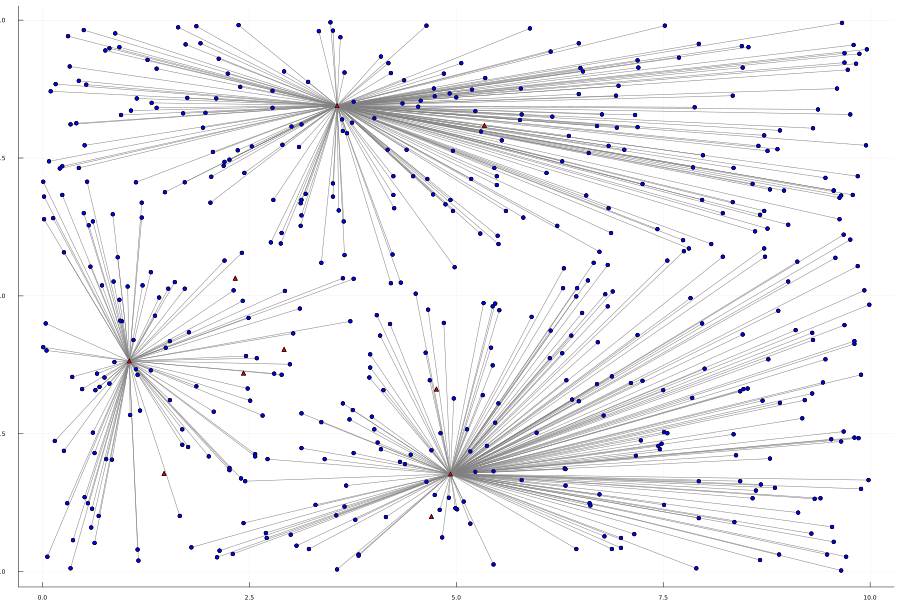

In [7]:
util, costo, Fclt, Clnt = cargaInst(dirInst,"i003")
mdl, x = mdlUFL(util, costo, zeros(size(util,2)) )
optimize!(mdl)
    
println()
if termination_status(mdl) == MOI.OPTIMAL   
    println( "numClientes = ", size(util,1), ", numLocaliz = ", size(util,2) )
    println( "valor optimo = ", objective_value(mdl), ", numLocalizAbiertas = ", sum(value.(x)) )
    arcos = genArcos( value.(x), util )
    dibuja( Clnt, Fclt, arcos )
elseif termination_status(mdl) == MOI.INFEASIBLE
    println( "infactible" )
elseif termination_status(mdl) == MOI.DUAL_INFEASIBLE
    println( "no_acotado" )
end   

Comienzo de iteraciones del algoritmo del sub-gradiente.
iter = 1 obj_zLR = 2784.2719999999995 valor incumbente = 2381.558
iter = 2 obj_zLR = 2784.1975371093745 valor incumbente = 2381.558
iter = 3 obj_zLR = 2784.1230742187495 valor incumbente = 2381.558
iter = 4 obj_zLR = 2784.0486113281245 valor incumbente = 2381.558
iter = 5 obj_zLR = 2783.9745898437495 valor incumbente = 2381.558
iter = 6 obj_zLR = 2783.900737304687 valor incumbente = 2381.558
iter = 7 obj_zLR = 2783.8268847656245 valor incumbente = 2381.558
iter = 8 obj_zLR = 2783.7533046874996 valor incumbente = 2381.558
iter = 9 obj_zLR = 2783.7166835937496 valor incumbente = 2381.558
iter = 10 obj_zLR = 2783.6800624999996 valor incumbente = 2381.558
iter = 11 obj_zLR = 2783.6434414062496 valor incumbente = 2381.558
iter = 12 obj_zLR = 2783.6068203124996 valor incumbente = 2381.558
iter = 13 obj_zLR = 2783.5701992187496 valor incumbente = 2381.558
iter = 14 obj_zLR = 2783.5336816406243 valor incumbente = 2381.558
iter = 15 obj_z

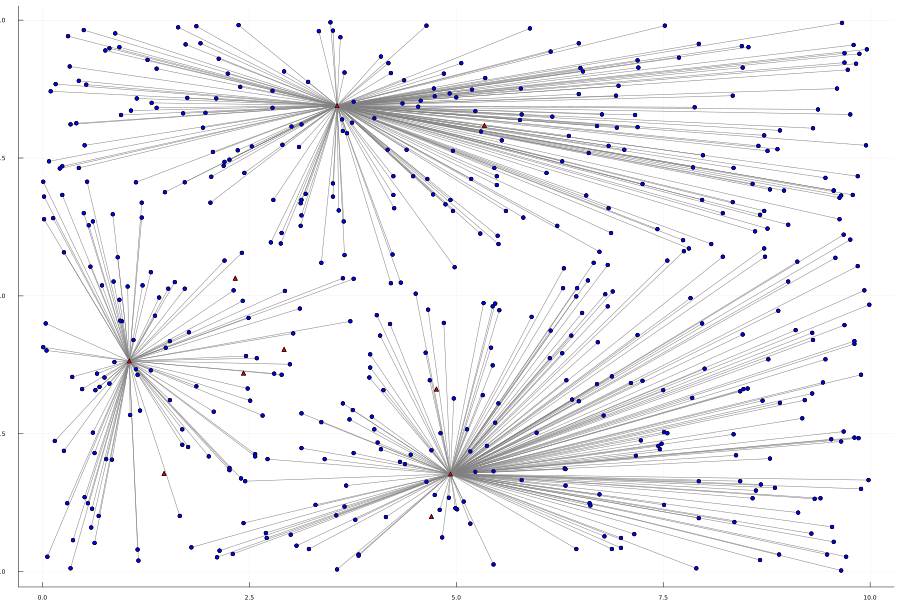

In [8]:
mu = initMu( util )                            # Inicializar mu[]
minObj_zLR = Inf                               # Inicializar mejor cota superior
xIncmb = ones(size(util,2))                    # Inicializar incumbente
zIncmb = zUFL( xIncmb, util, costo )           # Determinar valor de candidato incumbente

fIncmb = zeros(size(util,2))                   # Inicializa variables fijadas (ninguna)

println( "Comienzo de iteraciones del algoritmo del sub-gradiente." )
for t in 1:iter
    obj_zLR = zLR( mu, util, costo )           # Determina valor de la relajación Lagrangiana
    minObj_zLR = min( obj_zLR, minObj_zLR )    # Actualiza cota superior
  
    x = cotaInf( mu, util, costo )             # Determina candidato incumbente
    obj_z = zUFL( x, util, costo )             # Determinar valor de candidato incumbente
    if zIncmb < obj_z
        xIncmb = x
        fIncmb = findFixable(mu, util, costo, obj_zLR - obj_z )
    end
    
    zIncmb = max( zIncmb, obj_z )              # Actualiza cota inferior

    s = subGrad( mu, util, costo )             # Calcula nuevo subgradiente
    mu = mu - theta * s                        # Actualiza mu[]

    println( "iter = ", t, " obj_zLR = ", obj_zLR, " valor incumbente = ", obj_z )
    if ( (t % prd) == 0 )
        theta = theta/2
    end
end
println( "Fin de iteraciones del algoritmo del sub-gradiente.")

println()
println( "Numero de variables x[l] a fijar en 0 = ", sum(fIncmb) )

mdl, x = mdlUFL(util, costo, fIncmb )
optimize!(mdl)

println()
if termination_status(mdl) == MOI.OPTIMAL   
    println( "numClientes = ", size(util,1), ", numLocaliz = ", size(util,2) )
    println( "valor optimo = ", objective_value(mdl), ", numLocalizAbiertas = ", sum(value.(x)) )
    arcos = genArcos( value.(x), util )
    dibuja( Clnt, Fclt, arcos )
elseif termination_status(mdl) == MOI.INFEASIBLE
    println( "infactible" )
elseif termination_status(mdl) == MOI.DUAL_INFEASIBLE
    println( "no_acotado" )
end   